## Neural network classification

Classification is  a problem of predicting whether something is one thing or another
(there can be Multiple things as the options)

In [14]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

torch.__version__

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [20]:
## 1. Make classification data (custom data)
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

len(X), len(y), X[:5], y[:5]

(1000,
 1000,
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [21]:
# Make a dataframe of circle data
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [55]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

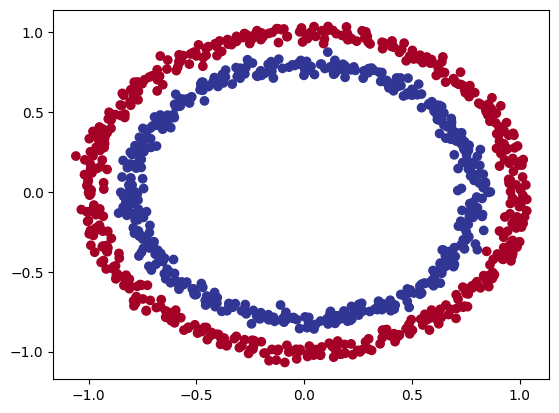

In [22]:
# Visualizatiom
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

## Check input and output shapes

In [24]:
X.shape, y.shape

((1000, 2), (1000,))

In [25]:
X_sample = X[0]
y_sample = y[0]

X_sample, y_sample, X_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

# Turn data into tensors and create train  and test splits

In [26]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [27]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, #split data into 20% test and 80%train
                                                    random_state=42, #nothing but random seed
                                                    )

In [28]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model
Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.module`)
3. pick a loss function and optim
4. create a testing and training loop

## Building a model

1. Subclass `nn.Module` (alsmost all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of our model
4. Instantiate an instance of our model class and send it to target device

In [30]:
# Construct a model that sunbclasses nn.module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer1 = nn.Linear(in_features=2,  out_features=5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=5) 
        self.layer_3 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and output as single layer which is output
    
    #Define a forward() method that outlines the forward pass    
    def forward(self,x):
       return self.layer_3(self.layer_1(x)) #x - layer_1 - layer_2 - layer_3 - output
    
# Instantiate an instance of our model class and send it to taget device
model_0 = CircleModelV0().to(device)
model_0




CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

In [35]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.0298, -0.3245],
         [ 0.4191, -0.2849],
         [ 0.1908, -0.0291],
         [-0.4031,  0.4259],
         [ 0.2585, -0.3774]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.5792,  0.5555, -0.0093, -0.0957, -0.4370], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0929, -0.0105,  0.0157,  0.1907, -0.4118],
         [ 0.4142, -0.3280, -0.2047,  0.2644, -0.0455],
         [-0.4026,  0.3956, -0.0567,  0.1728, -0.2773],
         [ 0.0917,  0.2041,  0.3467,  0.1281, -0.2412],
         [-0.3023, -0.1932,  0.2045, -0.0964,  0.0367]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([ 0.3418,  0.4217, -0.3253, -0.0352, -0.0308], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[-0.4250,  0.0745, -0.1858,  0.2609, -0.3901]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.2289], device='cuda:0', requires_g

In [37]:
#replicate the model using sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=5, bias=True)
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [38]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1210,  0.2164],
                      [ 0.6132,  0.3440],
                      [ 0.1985, -0.6759],
                      [ 0.2983, -0.4192],
                      [ 0.4689,  0.6538]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2423, -0.2621, -0.6988,  0.4452,  0.4935], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3440, -0.1056, -0.1584, -0.1220,  0.4196],
                      [ 0.1162, -0.0252, -0.2089,  0.3740, -0.2291],
                      [-0.3587, -0.3546,  0.3574, -0.3107, -0.4397],
                      [ 0.3227, -0.0269, -0.3158, -0.0196,  0.2055],
                      [-0.0421,  0.0070,  0.1496, -0.3348, -0.1714]], device='cuda:0')),
             ('1.bias',
              tensor([-0.4131,  0.0371,  0.4080, -0.2327, -0.3340], device='cuda:0')),
             ('2.weight',
              tensor([[ 0.0889,  0.0162, -0.1862, -0.3503, -0.2050]], device='cuda:0')),
             ('2

In [42]:
#Make predictions
with torch.inference_mode():
 untrained_preds = model_0(X_test.to(device))
 print (f"Len of preds:{len(untrained_preds)}, Shape{untrained_preds.shape}")
 print(f"Len of test samp:{X_test[:10]}, Shape: {X_test.shape}")
 print(f"\nFirst 10 preds:{untrained_preds[:10]}")
 print(f"\nFirst 10 lables: \n{y_test[:10]}")

Len of preds:200, Shapetorch.Size([200, 1])
Len of test samp:tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739]]), Shape: torch.Size([200, 2])

First 10 preds:tensor([[0.2728],
        [0.3234],
        [0.2142],
        [0.2892],
        [0.3316],
        [0.3615],
        [0.4109],
        [0.4201],
        [0.2094],
        [0.3281]], device='cuda:0')

First 10 lables: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Setup loss Function and optimizer

Loss func and optim is problem specific

for example for regression might want MAE or MSE(Mean absolute error or mean squared error)

for classification (binary cross entropy or categorical cross entropy)

Loss func - measure how **wrong** model predictions are

optimizer - 2 most common useful optim are SGD and ADAM but many are available (adjust the model in correct path it goes reducing loss)

In [43]:
#setup the loss function
#loss_fn = nn.BCELoss # BCE = requires input to have gone through sigmoid before going through BCE

loss_fn = nn.BCEWithLogitsLoss() #Sigmoid activation funtion built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [51]:
# Calculate accuracy - out of 100 example what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

## Train model

to train a model we are going to built a training loop:

1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward (Backpropogation)
5. Optimizer step (Gradient Descent)

## Going from raw logit - prediction probabilities - prediction lables

our model outputs are going to be raw **logits**

we can convert these **logits** into prediction probabilites by passing them into some kind of activation function ( eg. sigmoid for binary classification and softmax for multiclass classification)

Then we can concert out model's predcition probabilities to **prediction lables** by either rounding them of taking the `argmax()`

In [46]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[0.2728],
        [0.3234],
        [0.2142],
        [0.2892],
        [0.3316]], device='cuda:0')

In [47]:
# Use sigmoid activation funtion on our model logits to turn it into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs

tensor([[0.5678],
        [0.5802],
        [0.5533],
        [0.5718],
        [0.5821]], device='cuda:0')

In [48]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, y = 1 (class 1)
* `y_pred_probs` < 0.5 y = 0 (class 0)

In [49]:
# Find predicted lables
y_preds = torch.round(y_pred_probs)

# In Full (logits - pred probs - pred lables)
y_pred_lables =  torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_lables.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

### Building a Training and test loop

In [54]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the no of epochs
epochs = 100

#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range (epochs):
    # Training
    model_0.train()

    #Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits - pred probs - pred labels

    #Calculate loss/accuracy
    #loss = loss_fn(torch.sigmoid(y_logits), ## expects prediction probabilites as input
    #              y_train)
    loss = loss_fn(y_logits, # expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred = y_pred)
    
    #Optimizer zero grad
    optimizer.zero_grad()
    
    #Loss backward (back propogation)
    loss.backward()

    #Optimizer step 
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits,))

        #calulate the test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true= y_test,
                               y_pred = test_pred)
        
        #Print out what's happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss: .5f}, Acc: {acc: .2f}% | Test loss: {test_loss: .5f} | Test_acc: {test_acc: .2f}%")

Epoch: 0 | Loss:  0.70264, Acc:  50.00% | Test loss:  0.70391 | Test_acc:  50.00%
Epoch: 10 | Loss:  0.69680, Acc:  50.00% | Test loss:  0.69850 | Test_acc:  50.00%
Epoch: 20 | Loss:  0.69463, Acc:  52.50% | Test loss:  0.69647 | Test_acc:  54.50%
Epoch: 30 | Loss:  0.69380, Acc:  54.00% | Test loss:  0.69569 | Test_acc:  49.00%
Epoch: 40 | Loss:  0.69348, Acc:  52.25% | Test loss:  0.69538 | Test_acc:  48.50%
Epoch: 50 | Loss:  0.69335, Acc:  51.62% | Test loss:  0.69525 | Test_acc:  48.00%
Epoch: 60 | Loss:  0.69329, Acc:  50.88% | Test loss:  0.69519 | Test_acc:  47.50%
Epoch: 70 | Loss:  0.69326, Acc:  51.38% | Test loss:  0.69516 | Test_acc:  48.50%
Epoch: 80 | Loss:  0.69324, Acc:  51.00% | Test loss:  0.69514 | Test_acc:  48.00%
Epoch: 90 | Loss:  0.69323, Acc:  50.88% | Test loss:  0.69513 | Test_acc:  48.50%


## Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it let's make some predictions and make them visual

To do so we're going to import a function called `plot.decision_boundary()`

In [56]:
import requests
from pathlib import Path

# Download helper function from Learn pytorch repo (if it's not already downloaded)
if Path("helper_function.py").is_file():
    print("helper_function.py already exists")
else:
    print("Downloading helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

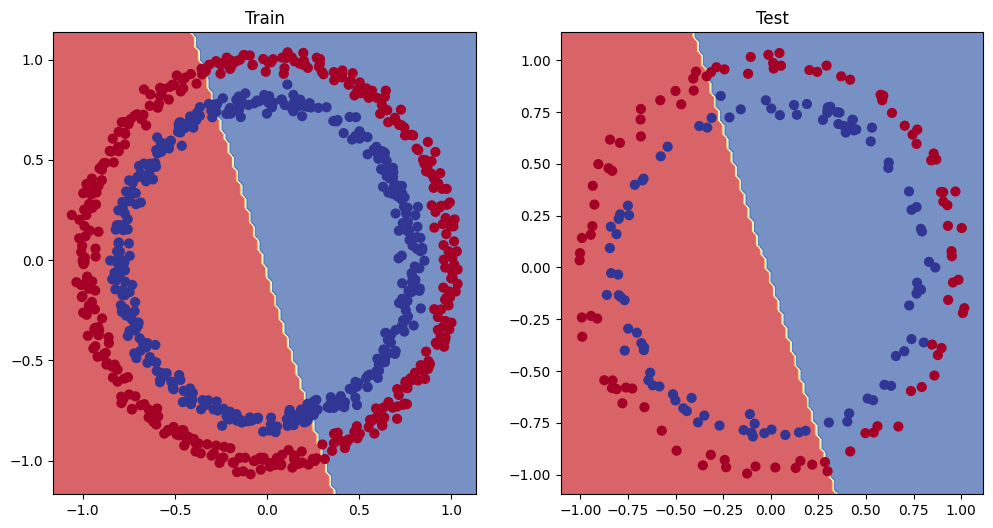

In [57]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)